## Problem Statement
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies

In general, datasets which contain marketing data can be used for business goal: 
- Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

In [1]:
# Import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

# Import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Data Exploration
After we imported the dataset, we have to look at the total number of rows in the dataset and analyze the number of missing values.

In [5]:
# Number of rows in dataset

print('Bank marketing dataset consists of {rows} rows'.format(rows=len(df)))

Bank marketing dataset consists of 11162 rows


In [6]:
# Find percentage of missing values for each column

missing_values = df.isnull().mean()*100
missing_values.sum

<bound method Series.sum of age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64>

So we can see that there are no missing values.

### Categorical columns exploration
In the dataset we have both categorical and numerical columns. Let's look at the values of categorical columns first.

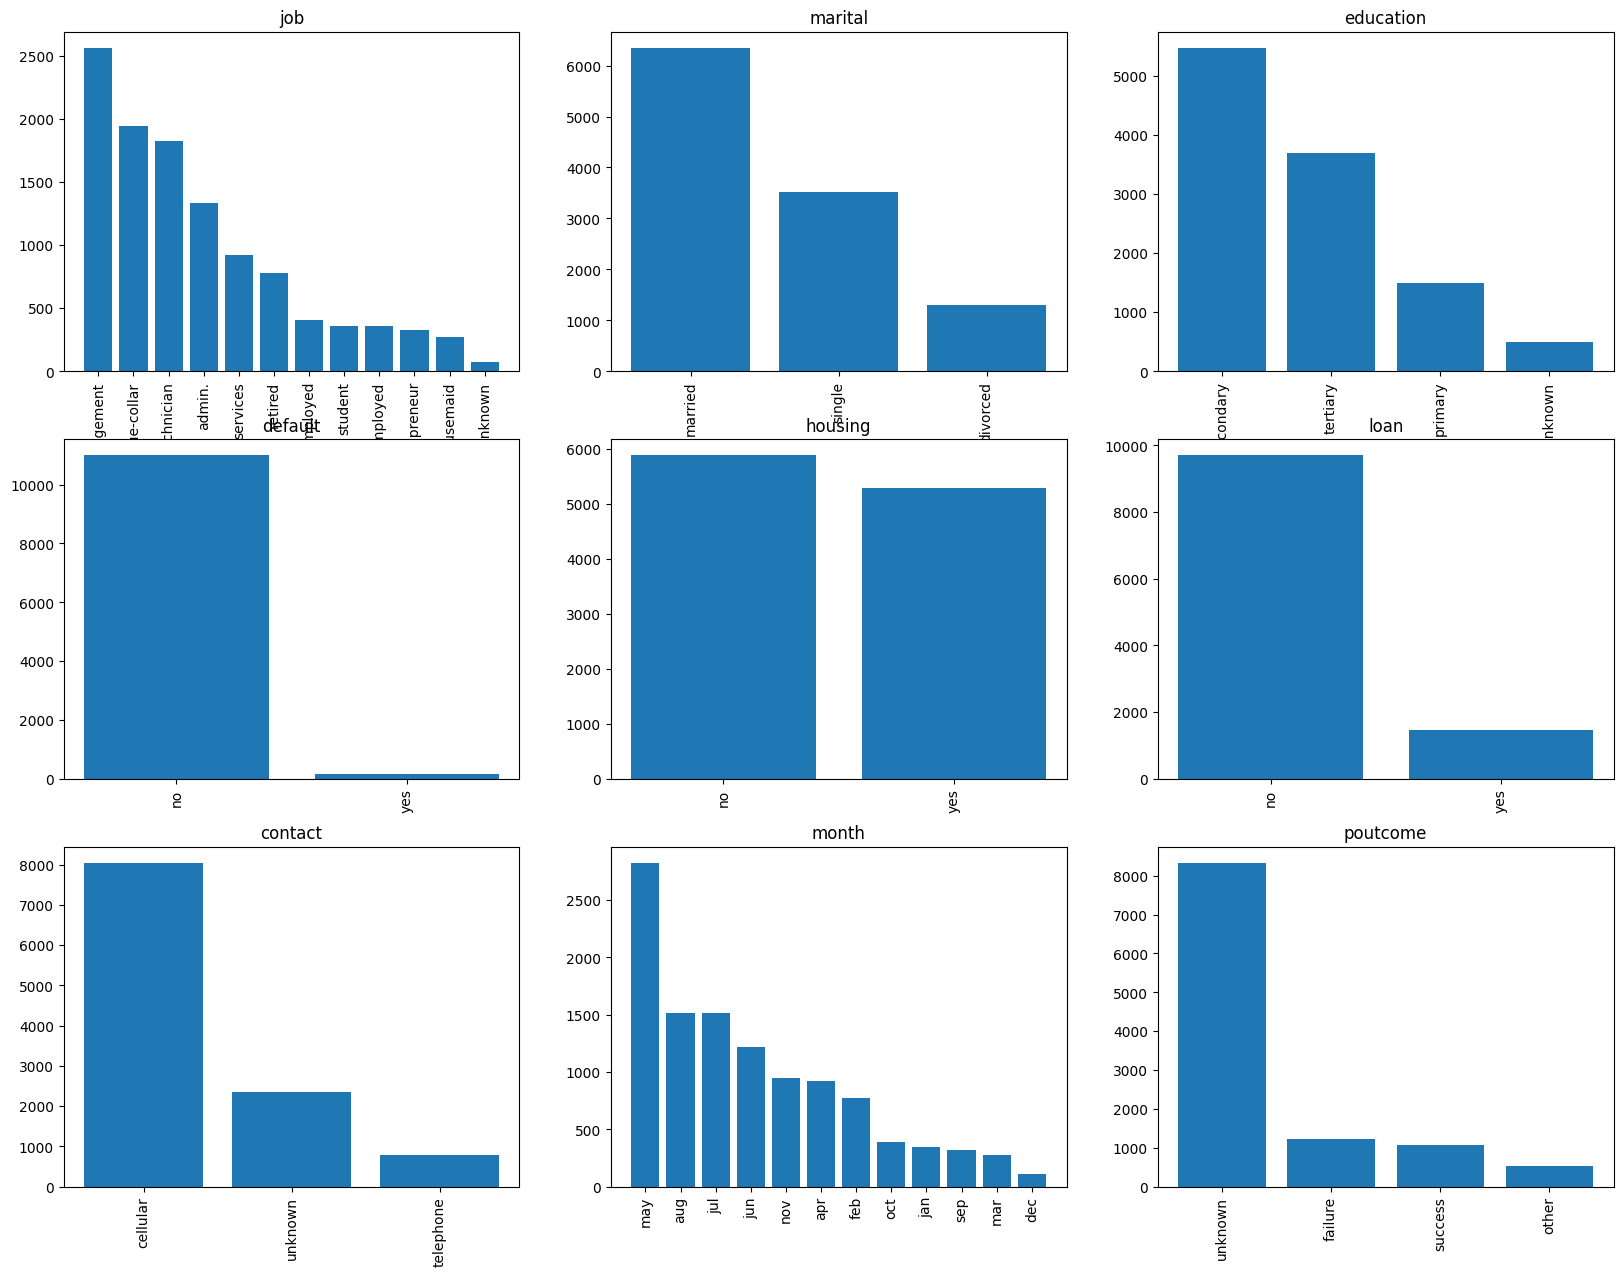

In [10]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(cat_column)
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1


plt.show()

### Numerical columns exploration
Now let's look at the numerical columns' values. The most convenient way to look at the numerical values is plotting histograms.

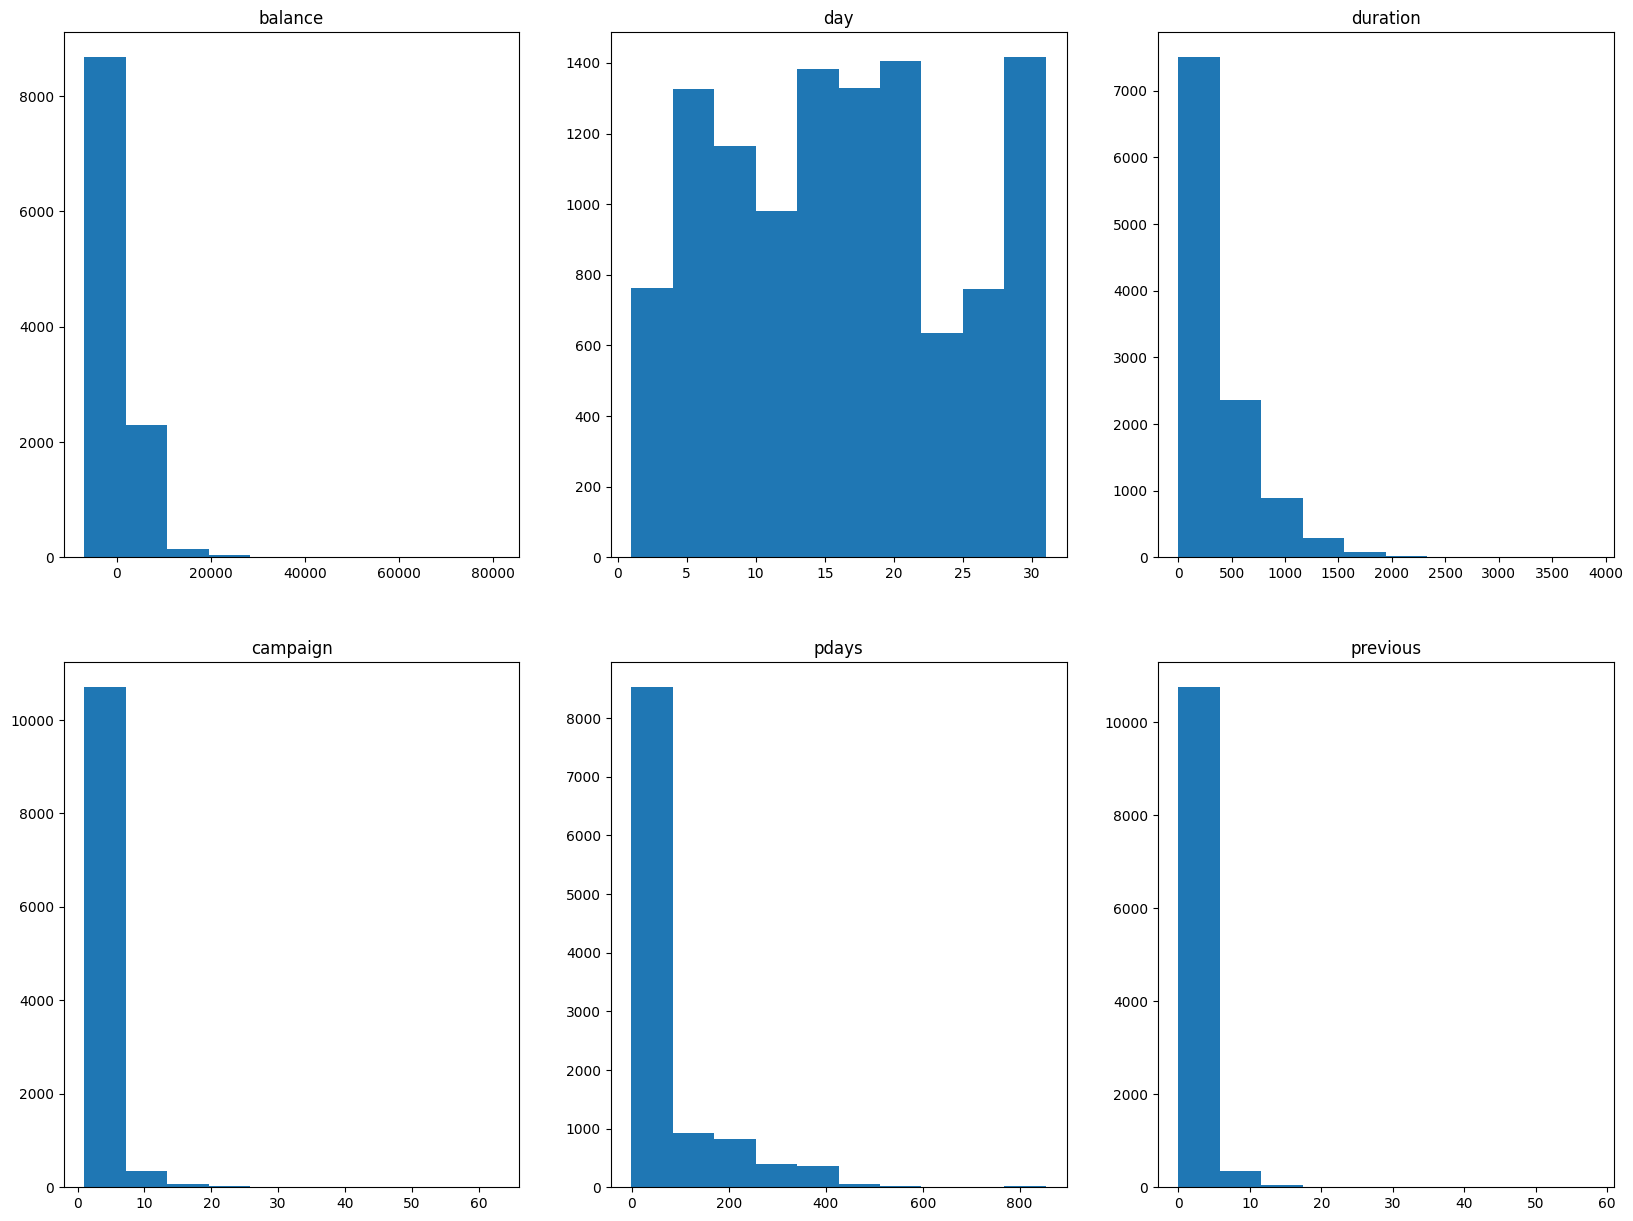

In [11]:
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize = (20, 15))

counter = 0
for num_col in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(df[num_col])
    axs[trace_x, trace_y].set_title(num_col)

    counter += 1

plt.show()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.

In [12]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


### Analysis of the response column
It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'deposit' column and compare its values to other columns.

First of all we should look at the number of 'yes' and 'no' values in the response column 'deposit'.

Let's see how 'deposit' column value varies depending on other categorical columns' values:

In [9]:
# Build a function to show categorical values distribution 
def plot_bar(column):
    # temp df
    temp_1 = pd.DataFrame()
    temp_1['No_deposit'] = df[df['deposit'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = df[df['deposit'] == 'yes'][column].value_counts()
    temp_1.plot(kind = 'bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

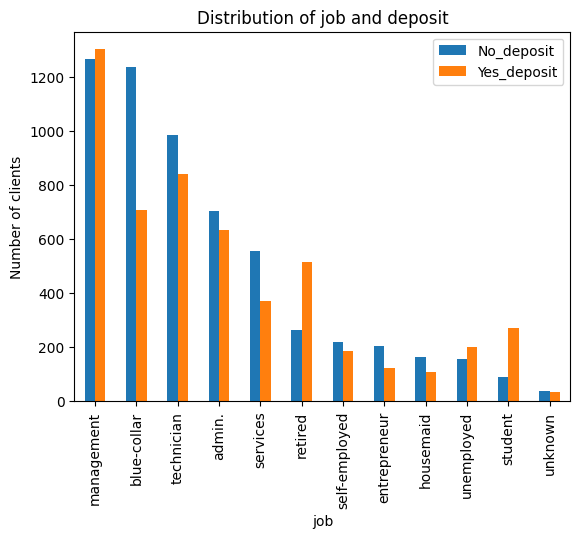

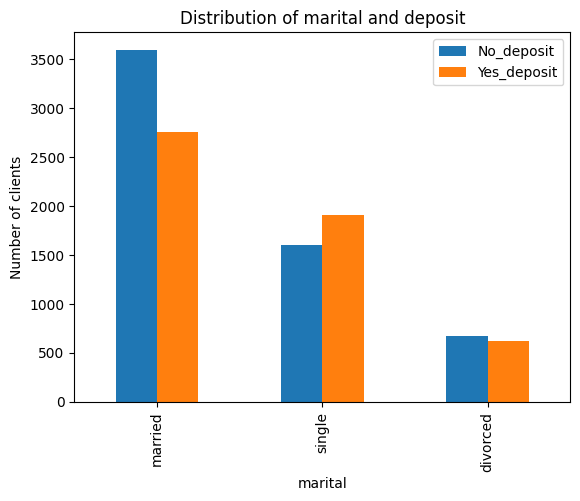

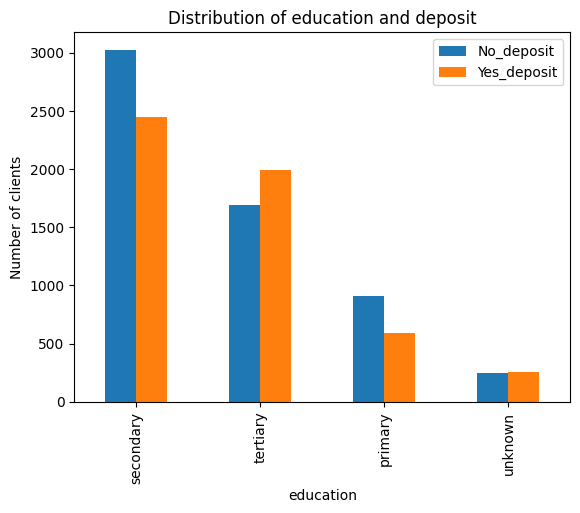

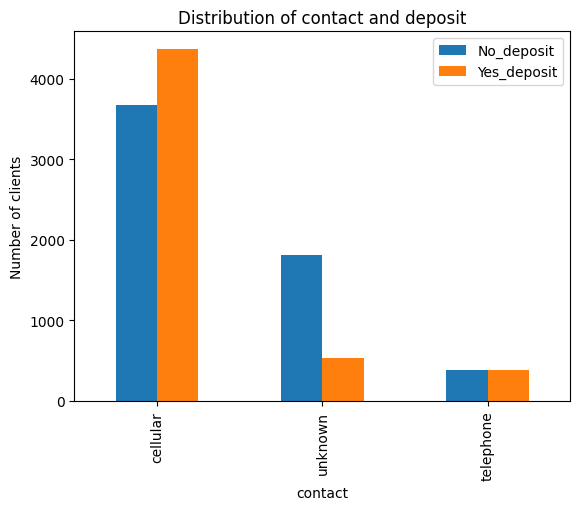

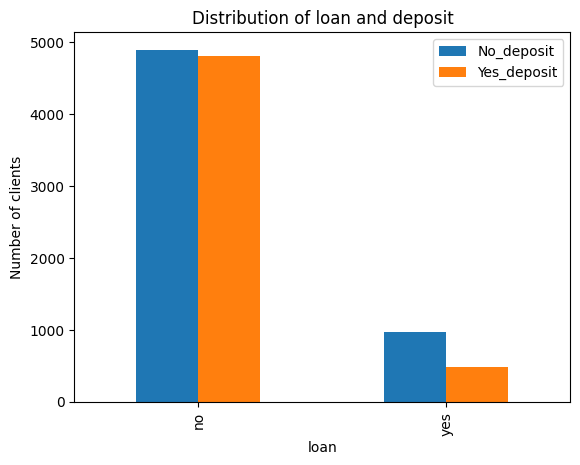

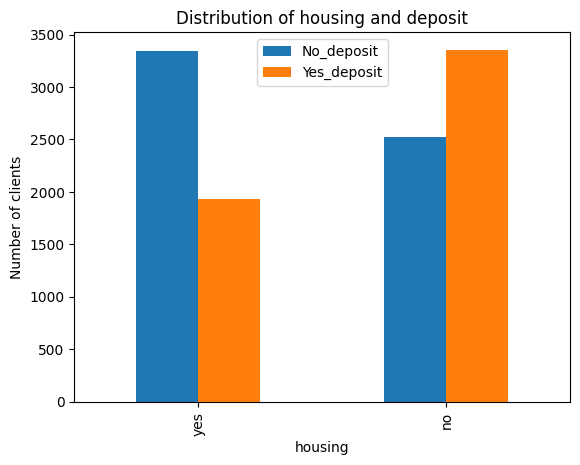

In [11]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing');

 Primary analysis of several categorical features reveals:

- Administrative staff and technical specialists opened the deposit most of all. Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit. In relative terms, a high proportion of pensioners and students might be mentioned as well.
- Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.
- Best communication channel is secullar. Customers with 'cellular' type of contact are less likely to subscribe for term deposit.
- The difference is evident between consumers who already use the services of banks and received a loan.
Home ownership does not greatly affect marketing company performance.

Now let's look how numerical columns affect term deposit subscription.

In [39]:
# Build a function to show categorical values distribution 
def plot_bar_stat(col):
    temp_2 = pd.DataFrame()
    temp_2[f'{col}_yes'] = (df[df['deposit'] == 'yes'][['deposit', col]].describe())[col]
    temp_2[f'{col}_no'] = (df[df['deposit'] == 'no'][['deposit', col]].describe())[col]
    temp_2.drop(['count', '25%', '50%', '75%']).plot.bar(title = '{} and deposit statistics'.format(col));

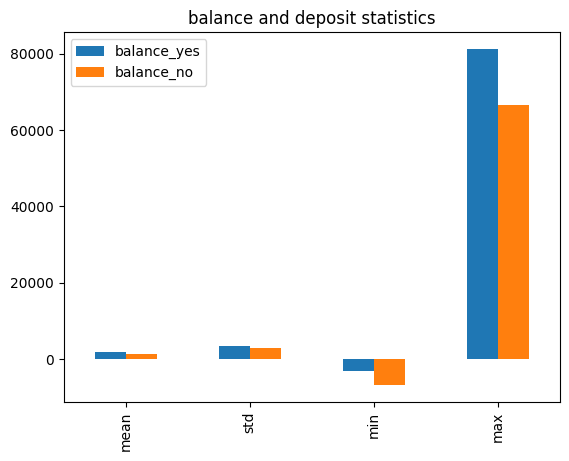

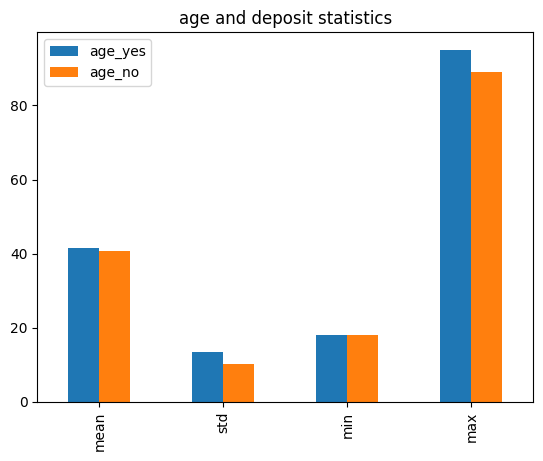

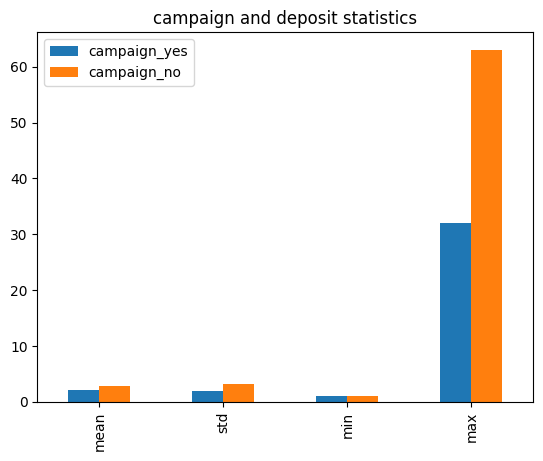

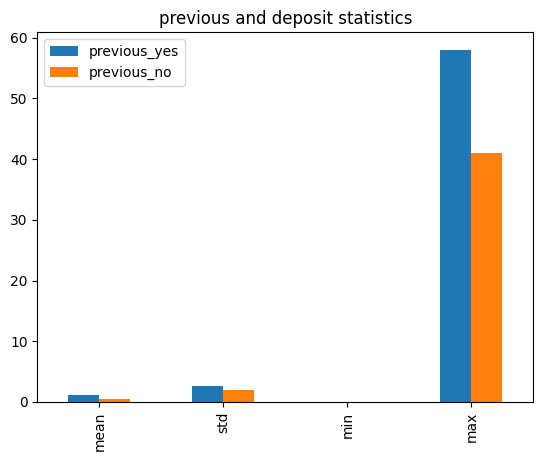

In [42]:
plot_bar_stat('balance'), plot_bar_stat('age'), plot_bar_stat('campaign'), plot_bar_stat('previous');

Looking at the diagrams above we can conclude that:
- People who subscribed for term deposit tend to have greater balance and age values.
- People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

## Conclusion
Key outcomes of the analysis are the recommendations for future marketing campaigns:
- The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490$ are more likely to subscribe for term deposit, so future address those customers.
- The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.
- Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.